In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#data = pd.read_csv("/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv")

from google.colab import drive
from google.colab import files
drive.mount('/content/drive/')

data = pd.read_csv("/content/drive/MyDrive/ACMResearch/labeled_data.csv")

df = pd.DataFrame(data) 

df.head()

Mounted at /content/drive/


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
class_tweet = df[['class', 'tweet']]
class_tweet.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
class_tweet['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split  

x_tweet = df[['tweet']]
y_class = df[['class']]

x_tweet_train, x_tweet_test, y_class_train, y_class_test = train_test_split(x_tweet, y_class, test_size=0.25, random_state=0)

#bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3") 
#bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [ ]:
x_tweet_train

pandas.core.frame.DataFrame

In [ ]:
x_tweet_test

,tweet
4129,@Misplaced_Momma \nHello dare momma. I show gl...
15081,RT @DymondMarie1: Shoutout to your main bitch !
16547,RT @MsKeeKee90s: Throw it up! Like a pizza! Ge...
4273,@Nien_Nunb what did you search? Gay redneck ep...
4254,@Ncoleycole u still a mutt tho lol
...,...
17416,RT @SteeloBrim: Captain Kirk hoe!
719,#HolySpirit Joshua 1:3 Every place that the so...
20518,"Reminiscin on my swinger days, when I drove a ..."
3152,@FOLLOWNOVA Yooo I was thinking bout that the ...


In [ ]:
y_class_train

,class
6455,1
13493,1
8003,2
24732,1
18088,1
...,...
13123,1
19648,2
9845,1
10799,1


In [ ]:
y_class_test

,class
4129,2
15081,1
16547,1
4273,0
4254,2
...,...
17416,1
719,2
20518,1
3152,1


In [ ]:
x_tweet_train.shape

(18587, 1)

In [ ]:
x_tweet_test.shape

(6196, 1)

In [ ]:
##no
#x_tweet_test_copy = x_tweet_test.copy()
#x_tweet_test_copy.reset_index(inplace = True)
#x_tweet_test_copy.shape

In [ ]:
##no
#x_tweet_train_copy = x_tweet_train.copy()
#x_tweet_train_copy.reset_index(inplace = True)
#x_tweet_train_copy.shape

In [ ]:
x_tweet_train = x_tweet_train.squeeze()
type(x_tweet_train.squeeze())

pandas.core.series.Series

In [ ]:
x_tweet_test = x_tweet_test.squeeze()
type(x_tweet_test)

pandas.core.series.Series

In [ ]:
x_tweet_test.shape

(6196,)

In [ ]:
x_tweet_train.shape

(18587,)

In [ ]:
import sklearn

In [ ]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.2.2.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(x_tweet_train)
tfidf_test = tfidf_vectorizer.transform(x_tweet_test)
tfidf_test.shape

(6196, 29743)

In [ ]:
tfidf_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#lists all the unique words it vectorized
#tfidf_vectorizer.vocabulary_

In [ ]:
y_class_test = y_class_test.squeeze()
type(y_class_test)

pandas.core.series.Series

In [ ]:
y_class_train = y_class_train.squeeze()
type(y_class_train)

pandas.core.series.Series

In [ ]:
#import pretrained model, import accuracy finder package (accuracy_score)
from sklearn.metrics import accuracy_score
#this pretrained model uses linear, while other was naive bayes
from sklearn.linear_model import PassiveAggressiveClassifier

#instantiate instance of own pretrained model
pac = PassiveAggressiveClassifier(max_iter=50)

#trains her pretrained model adapted to her own dataset using transfer learning
pac.fit(tfidf_train, y_class_train)

y_pred = pac.predict(tfidf_test) #Test or something
score = accuracy_score(y_class_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.3%


In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

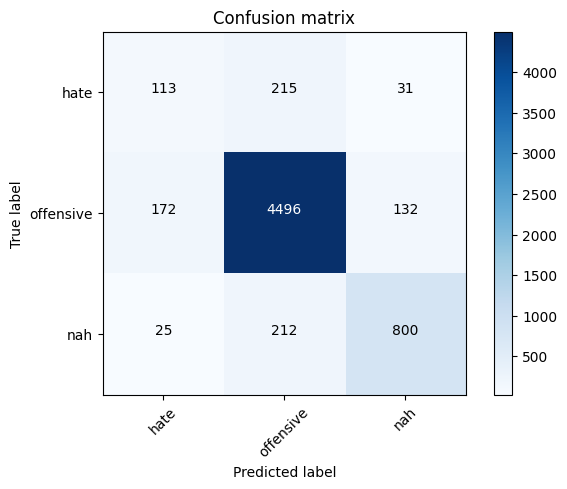

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_class_test, y_pred)
plot_confusion_matrix(CM, classes=['hate', 'offensive', 'nah']) #wow

In [ ]:
#2nd pretrained model
from sklearn.naive_bayes import MultinomialNB

#hyperparameter alpha value specific to naive bayes algorithm
mnb = MultinomialNB(alpha = 0.1)
mnb.fit(tfidf_train, y_class_train)
mnb_prediction = mnb.predict(tfidf_test)
score_mnb = accuracy_score(y_class_test,y_pred)
print(score_mnb)

0.8729825693996126


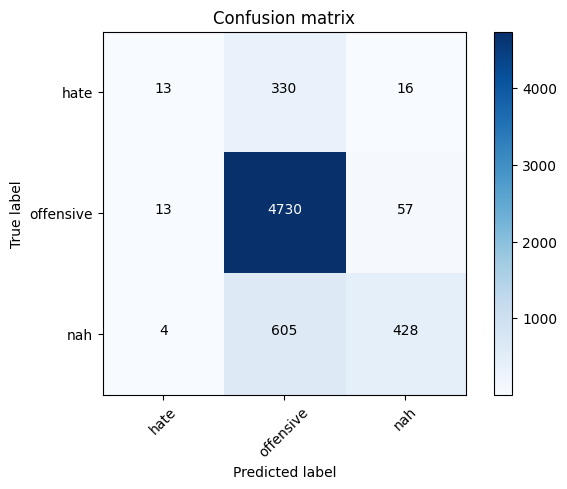

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_class_test, mnb_prediction)
plot_confusion_matrix(CM, classes=['hate', 'offensive', 'nah'])

In [ ]:
test_input = ['you suck']
tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction1 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction1)

if test_prediction1[0] == 0:
    print("pac: hate")
elif test_prediction1[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    

test2_prediction1 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction1)

if test2_prediction1[0] == 0:
    print("mnb: hate")
elif test2_prediction1[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [1]
pac: offensive
mnb:  [1]
mnb: offensive


In [ ]:
test_input = ['you big idiot know nothing useful u asshole']


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction2 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction2)

if test_prediction2[0] == 0:
    print("pac: hate")
elif test_prediction2[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
    
test2_prediction2 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction2)

if test2_prediction2[0] == 0:
    print("mnb: hate")
elif test2_prediction2[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [1]
pac: offensive
mnb:  [1]
mnb: offensive


In [ ]:
test_input = ['you']


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction3 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction3)

if test_prediction3[0] == 0:
    print("pac: hate")
elif test_prediction3[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
    
test2_prediction3 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction3)

if test2_prediction3[0] == 0:
    print("mnb: hate")
elif test2_prediction3[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [1]
pac: offensive
mnb:  [1]
mnb: offensive


In [ ]:
test_input = ['you are nice']


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction4 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction4)

if test_prediction4[0] == 0:
    print("pac: hate")
elif test_prediction4[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
test2_prediction4 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction4)

if test2_prediction4[0] == 0:
    print("mnb: hate")
elif test2_prediction4[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [2]
pac: nah
mnb:  [1]
mnb: offensive


In [ ]:
test_input = ["you bitch"]


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction5 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction5)

if test_prediction5[0] == 0:
    print("pac: hate")
elif test_prediction5[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
    
test2_prediction5 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction5)

if test2_prediction5[0] == 0:
    print("mnb: hate")
elif test2_prediction5[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [1]
pac: offensive
mnb:  [1]
mnb: offensive


In [ ]:
test_input = ['you have an ugly face']


tfidf_test_input = tfidf_vectorizer.transform(test_input)

test_prediction6 = pac.predict(tfidf_test_input)
print("pac: ", test_prediction6)

if test_prediction6[0] == 0:
    print("pac: hate")
elif test_prediction6[0] == 1:
    print("pac: offensive")
else:
    print("pac: nah")
    
    
test2_prediction6 = mnb.predict(tfidf_test_input)
print("mnb: ", test2_prediction6)

if test2_prediction6[0] == 0:
    print("mnb: hate")
elif test2_prediction6[0] == 1:
    print("mnb: offensive")
else:
    print("mnb: nah")

pac:  [0]
pac: hate
mnb:  [1]
mnb: offensive


In [ ]:
##past attempts
#from sklearn.tree import DecisionTreeClassifier

#clf = DecisionTreeClassifier()
#clf.fit(x_tweet_train, y_class_train)
#Accuracy = clf.score(x_tweet_test, y_class_test)
#print(Accuracy*100)

*BERT*-CLARE Augmentor

In [ ]:
!pip install -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.2-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.3
    Uninstalling protobuf-4.22.3:
      Successfully uninstalled protobuf-4.22.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [ ]:
import nltk; nltk.download('wordnet')
import numpy as np # linear algebra
import pandas as pd

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from textattack.augmentation import CLAREAugmenter

class SklearnCLAREAugmentor(CLAREAugmenter):
    def __init__(self, model, tokenizer):
        super().__init__()
        self.model = model
        self.tokenizer = tokenizer
    
    def get_model(self):
        return self.model
    
    def tokenize(self, text):
        return self.tokenizer.transform([text]).toarray()[0]

    def get_annotations(self, tokens):
        word_list = []
        pos_list = []
        for token in tokens:
            word_list.append(token.text)
            if token.ent_type_:
                pos_list.append(token.ent_type_)
            else:
                pos_list.append("")
        return word_list, pos_list

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

input_text = "I am feeling sad today"
doc = nlp(input_text)

# Add POS tags to the input text
text_with_pos_tags = ' '.join([f"{token.text}_{token.pos_}" for token in doc])
print(text_with_pos_tags)

I_PRON am_AUX feeling_VERB sad_ADJ today_NOUN


In [ ]:
from textattack.augmentation import CLAREAugmenter

from textattack.models.wrappers import SklearnModelWrapper
from flair.data import Sentence

#model_wrapper = SklearnModelWrapper(pac, tfir)

text = "How was your weekend?"

aug2 = CLAREAugmenter()
augmentedText = aug2.augment(text)

#aug = SklearnCLAREAugmentor(pac, tfidf_vectorizer, pos_tagging=False)
#augmentedText = aug.augment(text)

for augmented_text in augmentedText:
    print(augmented_text)

If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`
  0%|          | 0/10 [03:40<?, ?it/s]


KeyError: ignored

In [ ]:
#!pip install git+https://github.com/QData/TextAttack.git
#!pip install tensorflow_text

from textattack.augmentation import EmbeddingAugmenter 

augmenter = EmbeddingAugmenter(pct_words_to_swap=0.2, transformations_per_example=5)
s = "I'd love to go to Japan but the tickets are 500 dollars"
augmenter.augment(s)

["I'd adore to go to Japan but the tickets are 500 usd",
 "I'd adored to go to Japanese but the tickets are 500 dollars",
 "I'd amore to go to Japans but the tickets are 500 dollars",
 "I'd iove to go to Japan but the airfare are 500 dollars",
 "I'd love to going to Japan but the airfare are 500 dollars"]

In [ ]:
from textattack.augmentation import CheckListAugmenter 

augmenter = CheckListAugmenter(pct_words_to_swap=0.2, transformations_per_example=5)
s = "I'd love to go to Japan but the tickets are 500 dollars"
augmenter.augment(s)

['I would love to go to Japan but the tickets are 284 dollars',
 'I would love to go to Japan but the tickets are 401 dollars',
 'I would love to go to Japan but the tickets are 500 dollars',
 'I would love to go to Japan but the tickets are 679 dollars',
 'I would love to go to Japan but the tickets are 978 dollars']

In [ ]:
from textattack.attack_recipes import CLARE2020
from textattack.datasets import HuggingFaceDataset
from textattack import Attacker
import textattack

import textattack.datasets as datasets
from textattack.datasets import HuggingFaceDataset

#dataset = HuggingFaceDataset("rotten_tomatoes", None, "train")


from textattack.models.wrappers import SklearnModelWrapper

model_wrapper = SklearnModelWrapper(pac, tfidf_vectorizer)

text = "how was ur weekend?"

attack = CLARE2020.build(model_wrapper)

data2 = [("I enjoyed the movie a lot!"), ("Absolutely horrible film."), ("Our family had a fun time!")]
#dataset2 = datasets.Dataset(data, input_columns=['tweet'])
dataset2 = HuggingFaceDataset("rotten_tomatoes", None, "train")

#dataset = datasets.Dataset(data)
#dataset = textattack.datasets.HuggingFaceDataset(dataset)

# Create a HuggingFaceDataset object from the textattack dataset
#huggingface_dataset = HuggingFaceDataset(dataset)
#dataset = textattack.datasets.Dataset(data)

attacker = Attacker(attack, dataset2)
attacker.attack_dataset()

  0%|          | 0/10 [01:17<?, ?it/s]
If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`
textattack: Unknown if model of class <class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveClassifier'> compatible with goal function <class 'textattack.goal_functions.classification.untargeted_classification.UntargetedClassification'>.


  0%|          | 0/3 [00:00<?, ?it/s]

textattack: Loading datasets dataset rotten_tomatoes, split train.


Attack(
  (search_method): GreedySearch
  (goal_function):  UntargetedClassification
  (transformation):  CompositeTransformation(
    (0): WordSwapMaskedLM(
        (method):  bae
        (masked_lm_name):  RobertaForCausalLM
        (max_length):  512
        (max_candidates):  50
        (min_confidence):  0.0005
      )
    (1): WordInsertionMaskedLM(
        (masked_lm_name):  RobertaForCausalLM
        (max_length):  512
        (max_candidates):  50
        (min_confidence):  0.0
      )
    (2): WordMergeMaskedLM(
        (masked_lm_name):  RobertaForCausalLM
        (max_length):  512
        (max_candidates):  50
        (min_confidence):  0.005
      )
    )
  (constraints): 
    (0): UniversalSentenceEncoder(
        (metric):  cosine
        (threshold):  0.7
        (window_size):  15
        (skip_text_shorter_than_window):  True
        (compare_against_original):  True
      )
    (1): RepeatModification
    (2): StopwordModification
  (is_black_box):  True
) 




  0%|          | 0/10 [00:00<?, ?it/s]

AttributeError: ignored

In [ ]:
data.index

# New Section

In [ ]:
from flair.models import SequenceTagger
from flair.data import Sentence

def zip_flair_result(pred, tag_type="upos-fast"):
    """Takes a sentence tagging from `flair` and returns two lists, of words
    and their corresponding parts-of-speech."""
    from flair.data import Sentence

    if not isinstance(pred, Sentence):
        raise TypeError("Result from Flair POS tagger must be a `Sentence` object.")

    tokens = pred.tokens
    word_list = []
    pos_list = []
    for token in tokens:
        word_list.append(token.text)
        if "pos" == tag_type:
            pos_list.append(token.get_label("pos"))
        elif tag_type == "ner":
            pos_list.append(token.get_label("ner"))

    return word_list, pos_list

# Load the pre-trained POS tagger
tagger = SequenceTagger.load("pos")

# Create a sentence to be tagged
sentence = Sentence("How was your weekend?")

# Use the tagger to tag the sentence
tagger.predict(sentence)

# Extract the words and POS tags from the tagged sentence
word_list, pos_list = zip_flair_result(sentence, tag_type="pos")